In [48]:
import json
import numpy as np
import matplotlib.pyplot as plt
import astropy.table as table
from scipy.io.idl import readsav
import pandas as pd

def load_json_phot(fname):
    with open(fname, 'r') as f:
        data = json.load(f)
    sne = data[list(data.keys())[0]]
    phot = sne['photometry']
    times = [float(x['time']) for x in phot if 'band' in x]
    mag = [float(x['magnitude']) for x in phot if 'band' in x]
    band = [x['band'] for x in phot if 'band' in x]
    t = table.Table({'time': times, 'mag': mag, 'band': band})
    return t

In [24]:
## SN2019odp data
df_interpolated = pd.read_hdf('../products/lc_interpolated_per_ins.h5', '/lc')
idx_max = df_interpolated['mag_"r"_ZTF'].argmin()
jd_max = df_interpolated.index[idx_max]
peak_mag = df_interpolated['mag_"r"_ZTF'].min()
df_interpolated['phase'] = df_interpolated.index - jd_max
df_interpolated['diff'] = df_interpolated['mag_"r"_ZTF'] - peak_mag
df_interpolated

mag_"g"_ZTF  magerr_"g"_ZTF  mag_"i"_ZTF  magerr_"i"_ZTF  \
mjd                                                                    
58716.3888    18.972152        0.045186    19.230959        0.149647   
58717.3888    18.723950        0.036411    19.072053        0.117624   
58718.3888    18.482736        0.029957    18.891938        0.092034   
58719.3888    18.250384        0.025511    18.694685        0.072902   
58720.3888    18.028632        0.022634    18.484911        0.059742   
...                 ...             ...          ...             ...   
58871.3888    19.718567        0.159474          NaN             NaN   
58872.3888    19.729843        0.171648          NaN             NaN   
58873.3888          NaN             NaN          NaN             NaN   
58874.3888          NaN             NaN          NaN             NaN   
58875.3888          NaN             NaN          NaN             NaN   

            mag_"r"_ZTF  magerr_"r"_ZTF  mag_"g"_SEDM  magerr_"g"_SEDM  \
mjd                                                                      
58716.3888    18.833020        0.033760     18.069113         0.269980   
58717.3888    18.664586        0.024281     17.971336         0.235254   
58718.3888    18.477867        0.019041     17.870803         0.201954   
58719.3888    18.277773        0.017168     17.768423         0.170351   
58720.3888    18.069597        0.017043     17.665177         0.140704   
...                 ...             ...           ...              ...   
58871.3888    19.221826        0.127575           NaN              NaN   
58872.3888    19.231203        0.120985           NaN              NaN   
58873.3888    19.233642        0.113643           NaN              NaN   
58874.3888    19.228725        0.108614           NaN              NaN   
58875.3888    19.216243        0.110168           NaN              NaN   

            mag_"i"_SEDM  magerr_"i"_SEDM  mag_"r"_SEDM  magerr_"r"_SEDM  \
mjd                                                                        
58716.3888     18.568135         0.216188     18.630171         0.000006   
58717.3888     18.414624         0.184655     18.630171         0.000006   
58718.3888     18.259265         0.155399     18.630171         0.000006   
58719.3888     18.103288         0.128519           NaN              NaN   
58720.3888     17.947923         0.104088           NaN              NaN   
...                  ...              ...           ...              ...   
58871.3888           NaN              NaN           NaN              NaN   
58872.3888           NaN              NaN           NaN              NaN   
58873.3888           NaN              NaN           NaN              NaN   
58874.3888           NaN              NaN           NaN              NaN   
58875.3888           NaN              NaN           NaN              NaN   

            mag_"u"_SEDM  magerr_"u"_SEDM  phase      diff  
mjd                                                         
58716.3888     17.934097         0.000081  -21.0  2.530155  
58717.3888     17.934097         0.000081  -20.0  2.361720  
58718.3888     17.934097         0.000081  -19.0  2.175002  
58719.3888     17.934097         0.000081  -18.0  1.974907  
58720.3888     17.934097         0.000081  -17.0  1.766731  
...                  ...              ...    ...       ...  
58871.3888           NaN              NaN  134.0  2.918960  
58872.3888           NaN              NaN  135.0  2.928337  
58873.3888           NaN              NaN  136.0  2.930776  
58874.3888           NaN              NaN  137.0  2.925860  
58875.3888           NaN              NaN  138.0  2.913377  

[160 rows x 16 columns]

In [25]:
### PTF13bvn dataset
ptf_raw = table.Table.read('../data/comparison/PTF13bvn/raw_lc.dat', format='ascii')
#ptf_raw.pprint()
jd_grid = np.linspace(2456462, 2456520)
ptf_interp = {'time': jd_grid}
for band in 'rg':
    idx = ptf_raw['band'] == band
    mag = ptf_raw['mag'][idx]
    jd = ptf_raw['JD'][idx]
    if band == 'r':
        jd_max_idx = np.argmin(mag)
        peak_mag = np.min(mag)
        jd_max = jd[jd_max_idx]
    ptf_interp[band] = np.interp(jd_grid, jd, mag)
print('JD max: %f' % jd_max)
ptf_interp['phase'] = jd_grid - jd_max
ptf_interp['diff'] = ptf_interp['r'] - peak_mag
ptf_interp_t = table.Table(ptf_interp)
ptf_interp_t

JD max: 2456477.747000


<Table length=50>
       time                r          ...         diff       
     float64            float64       ...       float64      
------------------ ------------------ ... -------------------
         2456462.0  16.96969901859294 ...  1.8656990185929416
2456463.1836734693 16.537367709497115 ...  1.4333677094971158
2456464.3673469387 16.228365634747437 ...  1.1243656347474378
 2456465.551020408 15.962410072205955 ...   0.858410072205956
2456466.7346938774  15.78814938774798 ...   0.684149387747981
2456467.9183673467 15.666692322875525 ...  0.5626923228755256
 2456469.102040816 15.566343606833431 ...  0.4623436068334321
 2456470.285714286 15.442331998207312 ...  0.3383319982073125
2456471.4693877553 15.336989470974133 ... 0.23298947097413425
2456472.6530612246 15.288630508055894 ... 0.18463050805589454
               ...                ... ...                 ...
2456509.3469387754 16.867837792106915 ...  1.7638377921069157
2456510.5306122447 16.917629737602823 ...  1.8136297376028239
 2456511.714285714  16.96460434659077 ...  1.8606043465907725
 2456512.897959184  16.99676541825673 ...  1.8927654182567295
2456514.0816326533 17.013691771206865 ...   1.909691771206866
2456515.2653061226  17.03133827934823 ...  1.9273382793482305
 2456516.448979592 17.048368170585327 ...   1.944368170585328
2456517.6326530613   17.0819020533705 ...  1.9779020533704994
2456518.8163265307 17.116282966629512 ...  2.0122829666295132
         2456520.0 17.139076675260554 ...   2.035076675260555

In [28]:
## SN2008D Ib
sn08d = load_json_phot('../data/comparison/SN2008D.json')
idx = sn08d['band'] == "r'"
sn08d[idx]
peak_t = sn08d[idx]['time'][np.argmin(sn08d[idx]['mag'])]
sn08d_phase = sn08d[idx]['time'] - peak_t
peak_mag = sn08d[idx]['mag'].min()
sn08d_diff = sn08d[idx]['mag'] - peak_mag

In [45]:
## SN2007C Ib
sn07c = load_json_phot('../data/comparison/SN2007C.json')
idx = sn07c['band'] == "r'"
sn07c[idx]
peak_t = sn07c[idx]['time'][np.argmin(sn07c[idx]['mag'])]
sn07c_phase = sn07c[idx]['time'] - peak_t
peak_mag = sn07c[idx]['mag'].min()
sn07c_diff = sn07c[idx]['mag'] - peak_mag

In [49]:
## SN2007C Ib
sn07uy = load_json_phot('../data/comparison/SN2007uy.json')
idx = sn07uy['band'] == "r'"
sn07uy[idx]
peak_t = sn07uy[idx]['time'][np.argmin(sn07uy[idx]['mag'])]
sn07uy_phase = sn07uy[idx]['time'] - peak_t
peak_mag = sn07uy[idx]['mag'].min()
sn07uy_diff = sn07uy[idx]['mag'] - peak_mag

In [33]:
## SN2002ap Ib
sn02ap = load_json_phot('../data/comparison/SN2002ap.json')
idx = sn02ap['band'] == "R"
sn02ap[idx]
peak_t = sn02ap[idx]['time'][np.argmin(sn02ap[idx]['mag'])]
sn02ap_phase = sn02ap[idx]['time'] - peak_t
peak_mag = sn02ap[idx]['mag'].min()
sn02ap_diff = sn02ap[idx]['mag'] - peak_mag

In [39]:
## SN2016coi Ic-BL
sn16coi = load_json_phot('../data/comparison/SN2016coi.json')
idx = sn16coi['band'] == "r"
sn16coi[idx]
peak_t = sn16coi[idx]['time'][np.argmin(sn16coi[idx]['mag'])]
sn16coi_phase = sn16coi[idx]['time'] - peak_t
peak_mag = sn16coi[idx]['mag'].min()
sn16coi_diff = sn16coi[idx]['mag'] - peak_mag

In [52]:
def ingest(f):
    df = load_json_phot('../data/comparison/%s' % f)
    idx = df['band'] == 'R'
    peak_t = df[idx]['time'][np.argmin(df[idx]['mag'])]
    phase = df[idx]['time'] - peak_t
    peak_mag = df[idx]['mag'].min()
    diff = df[idx]['mag'] - peak_mag
    return phase, diff

sn98bw_phase, sn98bw_diff = ingest('SN1998bw.json')

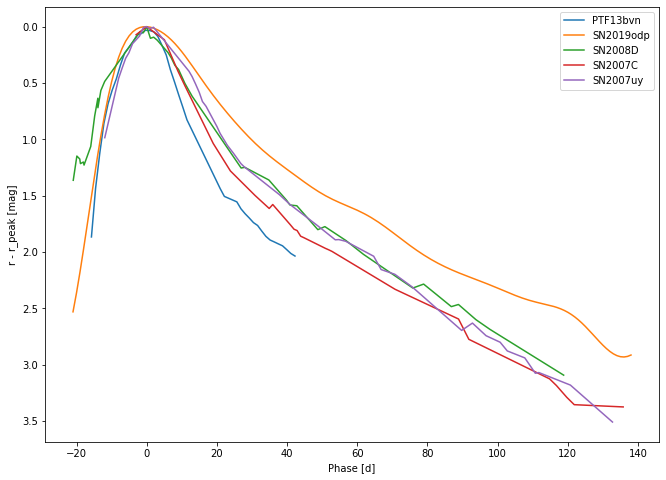

In [50]:
plt.figure(figsize=(11,8))
plt.plot(ptf_interp_t['phase'], ptf_interp_t['diff'], label='PTF13bvn')
plt.plot(df_interpolated['phase'], df_interpolated['diff'], label='SN2019odp')
plt.plot(sn08d_phase, sn08d_diff, label='SN2008D')
plt.plot(sn07c_phase, sn07c_diff, label='SN2007C')
plt.plot(sn07uy_phase, sn07uy_diff, label='SN2007uy')
#plt.plot(sn02ap_phase, sn02ap_diff, label='SN2002ap (R-band)')
idx = sn16coi_phase < 60
#plt.plot(sn16coi_phase[idx], sn16coi_diff[idx], label='SN2016coi')

plt.legend()
plt.xlabel('Phase [d]')
plt.ylabel('r - r_peak [mag]')
plt.gca().invert_yaxis()
#plt.xlim((-30, 60))

In [54]:
# Ic-BL comparison
plt.figure(figsize=(11,8))
plt.plot(df_interpolated['phase'], df_interpolated['diff'], label='SN2019odp')
idx = sn16coi_phase < 60
plt.plot(sn16coi_phase[idx], sn16coi_diff[idx], label='SN2016coi')
idx = sn98bw_phase < 60
plt.plot(sn98bw_phase[idx], sn98bw_diff[idx], label='SN1998bw')


plt.legend()
plt.xlabel('Phase [d]')
plt.ylabel('r - r_peak [mag]')
plt.gca().invert_yaxis()
#plt.xlim((-30, 60))